In [1]:
import pandas as pd
df_train = pd.read_csv("data/technical/sales_train.csv")

In [2]:
# https://www.kaggle.com/yasserhessein/predict-future-sales-using-4-algorithms-regression

from autoviz.AutoViz_Class import AutoViz_Class

def plot_all():
    AV = AutoViz_Class()
    target='item_price'
    df = AV.AutoViz(filename="",sep=',', depVar=target, dfte=df_train, header=0, verbose=1,
                    lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

# plot_all()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [3]:
# store the amount of items to verify it later on
og_df_size = df_train.shape[0]

In [4]:
# transform to df date format
df_train['date'] = pd.to_datetime(df_train['date'], dayfirst=True)
# convert date to month
df_train['date'] = df_train['date'].apply(lambda x: x.strftime('%Y-%m'))

# create new df and verify that nothing gets lost
df_all_sales = pd.DataFrame(df_train, columns=['date', 'item_cnt_day'])
print("Column entry match" if df_all_sales.shape[0] == og_df_size else "Warning!")

df_all_sales.head()

Column entry match


,date,item_cnt_day
0,2013-01,1.0
1,2013-01,1.0
2,2013-01,-1.0
3,2013-01,1.0
4,2013-01,1.0


In [5]:
print(df_all_sales.head())
df_all_sales.set_index('date', inplace=True)
df_all_sales_summed = df_all_sales.sum(level='date')
print(df_all_sales_summed)

      date  item_cnt_day
0  2013-01           1.0
1  2013-01           1.0
2  2013-01          -1.0
3  2013-01           1.0
4  2013-01           1.0
         item_cnt_day
date                 
2013-01      131479.0
2013-02      128090.0
2013-03      147142.0
2013-04      107190.0
2013-05      106970.0
2013-06      125381.0
2013-07      116966.0
2013-08      125291.0
2013-09      133332.0
2013-10      127541.0
2013-11      130009.0
2013-12      183342.0
2014-01      116899.0
2014-02      109687.0
2014-03      115297.0
2014-04       96556.0
2014-05       97790.0
2014-06       97429.0
2014-07       91280.0
2014-08      102721.0
2014-09       99208.0
2014-10      107422.0
2014-11      117845.0
2014-12      168755.0
2015-01      110971.0
2015-02       84198.0
2015-03       82014.0
2015-04       77827.0
2015-05       72295.0
2015-06       64114.0
2015-07       63187.0
2015-08       66079.0
2015-09       72843.0
2015-10       71056.0


<AxesSubplot:xlabel='date'>

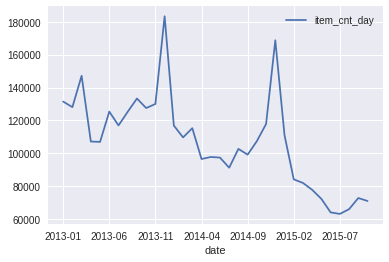

In [6]:
%matplotlib inline
df_all_sales_summed.plot()